In [1]:
import tensorflow

/home/home/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/home/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/home/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/home/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [2]:
#lets download and import the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#lets look at the shape of the dataset that is the number of datasets and number of arrays that the images represent
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
#lets look at how many classes of the dataset are present
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


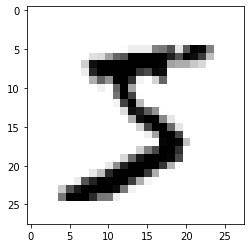

5


In [5]:
#lets look at one of the example of the dataset and its class label
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

print(y_train[0])

In [6]:
#ONE HOT ENCODING
#encoding labels
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

#lets label one class of encoded dataset
print("the first encoded label look like this:", y_train_encoded[0])

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)
the first encoded label look like this: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
#lets convert the n dimentional arrays to vectors
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

#lets look at the shape of the reshaped dataset
print("x_train_reshaped:", x_train_reshaped.shape)
print("x_test_reshaped:", x_test_reshaped.shape)

#lets look at the indivisual pixel values of the first image from the reshaped dataset
print("The pixel values of x_train_reshaped[0]:", set(x_train_reshaped[0]))

x_train_reshaped: (60000, 784)
x_test_reshaped: (10000, 784)
The pixel values of x_train_reshaped[0]: {0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [8]:
#lets normalize the reshaped dataset
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

#lets display the normalized dataset
print("The normalized values of x_train_reshaped[0]:", set(x_train_norm[0]))
print("\n\n")
print("The normalized values of x_test_reshaped[0]:", set(x_test_norm[0]))

The normalized values of x_train_reshaped[0]: {-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661

In [9]:
#NOTE:
#     The raw dataset was first converted to vectors, it was normalized and then was reshaped into pixel values.
#     All this was done to increase the particularity of the dataset so that the neural network is more accurate.
#     Had the raw dataset been used in the neural network, the accuracy would have decreased drastically.

#NOW LETS CREATE THE CONVOLUTIONAL NEURAL NETWORK MODEL

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#lets define the model
CNN = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ])

#lets compile the model
CNN.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

#lets summarize the model
CNN.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [11]:
#lets train the model now
CNN.fit(x_train_norm, y_train_encoded, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3672 - acc: 0.8924
Epoch 2/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1816 - acc: 0.9465
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1377 - acc: 0.9596
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1113 - acc: 0.9671
Epoch 5/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0938 - acc: 0.9715


In [12]:
#lets evaluate the model with testing dataset
loss, accuracy = CNN.evaluate(x_test_norm, y_test_encoded)
print("Test Set Acuuracy:", accuracy*100)
print("Test Set Loss:", loss*100)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.1017 - acc: 0.9684
Test Set Acuuracy: 96.84000015258789
Test Set Loss: 10.171321918088942


In [13]:
#lets perform predictions on the model
preds = CNN.predict(x_test_norm)
print("Shape of prediction:", preds.shape)

Shape of prediction: (10000, 10)


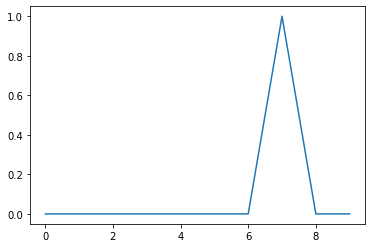

In [14]:
plt.plot(preds[0])
plt.show()